<a href="https://colab.research.google.com/github/wajdalturki/Wajdalturki/blob/main/test_day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Feature Scaling & Feature Engineering

![](https://static01.nyt.com/images/2020/11/29/fashion/24DIAMONDREPLICA2/24DIAMONDREPLICA2-superJumbo.jpg)

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

The idea with gradient descent is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

![](https://kevinbinz.files.wordpress.com/2019/05/gradient_descent_line_graph.gif)

- [Feature Scaling Reference](https://en.wikipedia.org/wiki/Feature_scaling#:~:text=a%20distance%20measure.-,Application,scaling%20changes%20the%20SVM%20result.)
- [Gradient Descent Reference](https://en.wikipedia.org/wiki/Gradient_descent)

### Assignment (Day 1 & Day 2)

Repeat the steps for the test data and report your results at the bottom of this notebook.

**Requirements:**
- Show the results (MSE, MAE, RMSE) for all models finished during the lecture using the test data.
- Make sure to follow the steps and all additional preprocessing code
- Your results should be displayed at the bottom of this notebook in a single code cell output or markdown cell
- Only progress as far as we progressed in class
- **(Day 2 Task):** Complete all tasks listed above
- **(Day 2 Task):** Create a plot displaying the results of the test set on each of the models
- **(Day 2 Task):** Show the results (MSE, MAE, RMSE) for all models (yesterday and today). You should be reporting on the results of 7 models.
- **(Day 2 Task):** Try to refactor the code. The notebook is purposely written for teaching out of. Can you refactor the lecture code by reducing the amount of lines of code or writing a function to combine a couple tasks together? Explain how you tried to refactor the code in a markdown cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [ ]:
# Load Data
df = sns.load_dataset("diamonds")

# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)



In [ ]:
test, train = train_test_split(
    df, 
    test_size = .80,
    train_size =.20,
    random_state=42
)

test, val = train_test_split(
    test,
    test_size = .80,
    train_size = .20,
    random_state=42
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Model with only numeric features
train.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
# Model with only numeric features
test.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
(df.dtypes != "category").values

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
df.dtypes != "category"

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
price       True
x           True
y           True
z           True
dtype: bool

In [ ]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [ ]:
train_numeric

,carat,depth,table,price,x,y,z
6881,1.16,60.8,65.0,4131,6.78,6.75,4.11
15412,1.51,61.3,55.0,6173,7.41,7.36,4.53
3782,1.01,64.0,59.0,3461,6.34,6.31,4.05
34635,0.31,61.9,55.0,872,4.39,4.36,2.71
37155,0.32,61.0,57.0,972,4.46,4.42,2.71
...,...,...,...,...,...,...,...
15653,1.54,61.5,61.0,6278,7.41,7.31,4.53
30039,0.32,61.3,56.0,719,4.40,4.44,2.71
47963,0.52,61.2,58.0,1919,5.20,5.16,3.17
48105,0.50,60.7,57.0,1935,5.14,5.10,3.11


In [ ]:
# Create X, y train and validation sets

target = "price"

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [ ]:
y_train

6881     4131
15412    6173
3782     3461
34635     872
37155     972
         ... 
15653    6278
30039     719
47963    1919
48105    1935
49854    2171
Name: price, Length: 34521, dtype: int64

In [ ]:
X_train

,carat,depth,table,x,y,z
6881,1.16,60.8,65.0,6.78,6.75,4.11
15412,1.51,61.3,55.0,7.41,7.36,4.53
3782,1.01,64.0,59.0,6.34,6.31,4.05
34635,0.31,61.9,55.0,4.39,4.36,2.71
37155,0.32,61.0,57.0,4.46,4.42,2.71
...,...,...,...,...,...,...
15653,1.54,61.5,61.0,7.41,7.31,4.53
30039,0.32,61.3,56.0,4.40,4.44,2.71
47963,0.52,61.2,58.0,5.20,5.16,3.17
48105,0.50,60.7,57.0,5.14,5.10,3.11


In [ ]:
X_train.describe()

,carat,depth,table,x,y,z
count,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000
mean,0.799955,61.745442,57.457409,5.737033,5.740898,3.541986
std,0.473342,1.433882,2.231511,1.120339,1.156860,0.711898
min,0.200000,43.000000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.8661014078099777

In [ ]:
# Same order as columns passed into the model
lr.coef_

array([10648.67477587,  -200.44764091,  -105.60923409, -1273.05445187,
          38.36164601,    54.22385327])

In [ ]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y.mean() for x in range(len(y_train))]
res0 = calc_cost(y_train, b_preds)
print("\nLinear Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline


NameError: ignored

## Feature Scaling

![](https://miro.medium.com/max/2625/1*yR54MSI1jjnf2QeGtt57PA.png)

The `sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

Here is a list of ML algorithms that require feature scaling and some that dont.
![](https://miro.medium.com/max/1184/1*5N0SXyZVXUV-MZuxb1mZ2g.png)

#### Standard Scaler

![](https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF)

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_001.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png)

The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

```python
>>> from sklearn import preprocessing
>>> import numpy as np
>>> X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_
array([1. ..., 0. ..., 0.33...])

>>> scaler.scale_
array([0.81..., 0.81..., 1.24...])

>>> X_scaled = scaler.transform(X_train)
>>> X_scaled
array([[ 0.  ..., -1.22...,  1.33...],
       [ 1.22...,  0.  ..., -0.26...],
       [-1.22...,  1.22..., -1.06...]])
```

[Standard Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Look at the transformed data
X_train_scaled[:5]

In [ ]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

In [ ]:
res2 = calc_cost(y_val, lr2.predict(X_val_scaled))

In [ ]:
lr2.coef_

In [ ]:
pd.DataFrame(X_train_scaled).describe()

#### Looking at the Parameters of the Model (Weights)

We can look at calculated parameters of the model side by side and notice the scales have changed. Looking at the parameters of the model can help us understand which features or more important. 

In [ ]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

#### Robust Scaler

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

[Robust Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [ ]:
df.columns

In [ ]:
df[["carat"]].plot(kind="box")

In [ ]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)

# Look at the transformed data
X_train_robust[:5]

In [ ]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

In [ ]:
res3 = calc_cost(y_val, lr3.predict(X_val_robust))

In [ ]:
lr2.coef_

In [ ]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

#### Min Max Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

[Min Max Scaler Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_train_mm[:5]

In [ ]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val)

In [ ]:
res4 = calc_cost(y_val, lr4.predict(X_val_mm))

In [ ]:
lr4.coef_

In [ ]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

###Assignment:

Show the results (MSE, MAE, RMSE) for all models finished during the lecture using the test data.


In [ ]:
test, train = train_test_split(
    df, 
    test_size = .80,
    train_size =.20,
    random_state=42
)

test, val = train_test_split(
    test,
    test_size = .80,
    train_size = .20,
    random_state=42
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Model with only numeric features
test.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
(df.dtypes != "category").values

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
df.dtypes != "category"

carat       True
cut        False
color      False
clarity    False
depth       True
table       True
price       True
x           True
y           True
z           True
dtype: bool

In [ ]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

test_numeric = cleaner(test)
val_numeric = cleaner(val)

In [ ]:
test_numeric

,carat,depth,table,price,x,y,z
30734,0.41,64.2,57.0,739,4.67,4.71,3.01
29685,0.35,60.5,56.0,707,4.60,4.63,2.79
33397,0.39,62.1,53.0,828,4.73,4.77,2.95
52256,0.71,58.7,61.0,2489,5.83,5.86,3.43
27332,1.76,61.1,59.0,17888,7.81,7.90,4.80
...,...,...,...,...,...,...,...
44278,0.51,63.6,59.0,1577,4.99,5.07,3.20
39892,0.42,61.4,57.0,1103,4.83,4.78,2.95
4996,0.58,62.2,56.0,3741,5.34,5.36,3.33
29401,0.40,62.9,57.0,699,4.69,4.72,2.96


In [ ]:
# Create X, y test and validation sets

target = "price"

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [ ]:
y_test

30734      739
29685      707
33397      828
52256     2489
27332    17888
         ...  
44278     1577
39892     1103
4996      3741
29401      699
13074     5412
Name: price, Length: 2157, dtype: int64

In [ ]:
X_test

,carat,depth,table,x,y,z
30734,0.41,64.2,57.0,4.67,4.71,3.01
29685,0.35,60.5,56.0,4.60,4.63,2.79
33397,0.39,62.1,53.0,4.73,4.77,2.95
52256,0.71,58.7,61.0,5.83,5.86,3.43
27332,1.76,61.1,59.0,7.81,7.90,4.80
...,...,...,...,...,...,...
44278,0.51,63.6,59.0,4.99,5.07,3.20
39892,0.42,61.4,57.0,4.83,4.78,2.95
4996,0.58,62.2,56.0,5.34,5.36,3.33
29401,0.40,62.9,57.0,4.69,4.72,2.96


In [ ]:
X_test.describe()

,carat,depth,table,x,y,z
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,0.787997,61.734261,57.557904,5.713713,5.714840,3.524942
std,0.463456,1.437307,2.236016,1.101009,1.092295,0.683692
min,0.200000,54.700000,50.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,4.700000,4.710000,2.910000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.510000
75%,1.030000,62.500000,59.000000,6.500000,6.510000,4.020000
max,3.010000,69.600000,70.000000,9.440000,9.380000,5.650000


In [ ]:
lr5 = LinearRegression()
lr5.fit(X_test, y_test)
lr5.score(X_val, y_val)

0.8631423236706628

In [ ]:
# Same order as columns passed into the model
lr5.coef_

array([11331.31926211,  -173.4842851 ,   -89.1395872 , -2454.46779437,
         939.49937464,    88.26991304])

In [ ]:
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y_test.mean() for x in range(len(y_test))]
res0 = calc_cost(y_test, b_preds)
print("\nLinear Regression")
res1 = calc_cost(y_test, lr5.predict(X_test))

Baseline
MSE: 15477651.304509753
MAE: 2969.0450046844285
RMSE: 3934.164626005088

Linear Regression
MSE: 2170353.2487983797
MAE: 864.5229885706963
RMSE: 1473.2118818412985


##**Feature Scaling**


##**1- Standard Scaler Docs**

In [ ]:
# Instantiate Scaler Object
scaler6 = StandardScaler()

# Apply to X data
X_test_scaled = scaler6.fit_transform(X_test)
X_val_scaled = scaler6.transform(X_val)

# Look at the transformed data
X_test_scaled[:5]

array([[-0.81579457,  1.71592466, -0.24956615, -0.94818115, -0.92014835,
        -0.75335261],
       [-0.94528673, -0.85893021, -0.69689386, -1.01177396, -0.99340565,
        -1.07520936],
       [-0.85895862,  0.25452054, -2.03887702, -0.89367302, -0.86520538,
        -0.84113172],
       [-0.1683338 , -2.11156231,  1.53974473,  0.10564267,  0.13292532,
        -0.13889881],
       [ 2.09777891, -0.44138618,  0.64508929,  1.9044109 ,  2.00098644,
         1.86539094]])

In [ ]:
# Test the model
lr6 = LinearRegression()
lr6.fit(X_test_scaled, y_test)
lr6.score(X_val_scaled, y_val)

0.8631423236706628

In [ ]:
res2 = calc_cost(y_val, lr6.predict(X_val_scaled))

MSE: 2164706.439668235
MAE: 880.7718755495545
RMSE: 1471.2941377128623


In [ ]:
lr6.coef_

array([ 5250.35015377,  -249.29244042,  -199.27132506, -2701.76343193,
        1025.97216998,    60.33547833])

In [ ]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5
count,2.157000e+03,2.157000e+03,2.157000e+03,2.157000e+03,2.157000e+03,2.157000e+03
mean,-7.998547e-17,5.557980e-15,1.481121e-15,8.554431e-17,-1.019120e-17,6.055013e-16
std,1.000232e+00,1.000232e+00,1.000232e+00,1.000232e+00,1.000232e+00,1.000232e+00
min,-1.269017e+00,-4.895189e+00,-3.380860e+00,-1.802142e+00,-1.863336e+00,-5.156938e+00
25%,-8.373766e-01,-5.109769e-01,-6.968939e-01,-9.209271e-01,-9.201484e-01,-8.996511e-01
50%,-1.899158e-01,1.153392e-01,-2.495661e-01,-1.245828e-02,4.725045e-03,-2.186000e-02
75%,5.222910e-01,5.328832e-01,6.450893e-01,7.143168e-01,7.281409e-01,7.242625e-01
max,4.795532e+00,5.473821e+00,5.565694e+00,3.385215e+00,3.356246e+00,3.108928e+00


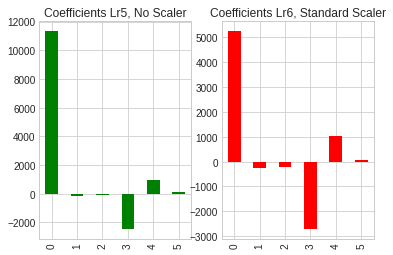

In [ ]:
fig, ax = plt.subplots(1,2)

pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, No Scaler", color="green", ax=ax[0])
pd.Series(lr6.coef_).plot(kind="bar", title="Coefficients Lr6, Standard Scaler", color="Red", ax=ax[1]);


##**2- Robust Scaler**

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# Instantiate Scaler Object
scaler7 = RobustScaler()

# Apply to X data
X_test_robust = scaler7.fit_transform(X_test)
X_val_robust = scaler7.transform(X_val)

# Look at the transformed data
X_test_robust[:5]

array([[-0.46031746,  1.53333333,  0.        , -0.57222222, -0.56111111,
        -0.45045045],
       [-0.55555556, -0.93333333, -0.33333333, -0.61111111, -0.60555556,
        -0.64864865],
       [-0.49206349,  0.13333333, -1.33333333, -0.53888889, -0.52777778,
        -0.5045045 ],
       [ 0.01587302, -2.13333333,  1.33333333,  0.07222222,  0.07777778,
        -0.07207207],
       [ 1.68253968, -0.53333333,  0.66666667,  1.17222222,  1.21111111,
         1.16216216]])

In [ ]:
# Test the model
lr7 = LinearRegression()
lr7.fit(X_test_robust, y_test)
lr7.score(X_val_robust, y_val)

0.8631423236706628

In [ ]:
res3 = calc_cost(y_val, lr7.predict(X_val_robust))

MSE: 2164706.4396682344
MAE: 880.7718755495541
RMSE: 1471.294137712862


In [ ]:
lr7.coef_

array([ 7138.73113513,  -260.22642765,  -267.4187616 , -4418.04202987,
        1691.09887435,    97.97960347])

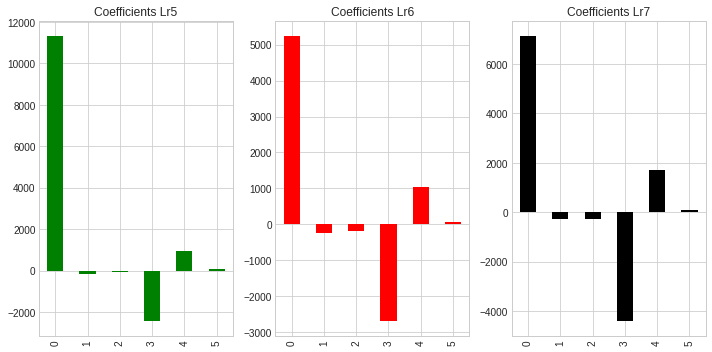

In [ ]:
fig, ax = plt.subplots(1,3)

pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5", color="green", ax=ax[0])
pd.Series(lr6.coef_).plot(kind="bar", title="Coefficients Lr6", color="red", ax=ax[1])
pd.Series(lr7.coef_).plot(kind="bar", title="Coefficients Lr7", color="black", ax=ax[2], figsize=(10,5))
plt.tight_layout();

##**3- Min Max Scaler**

In [ ]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_test_mm = scaler3.fit_transform(X_test)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_test_mm[:5]

array([[0.0747331 , 0.63758389, 0.35      , 0.16462347, 0.18070175,
        0.53274336],
       [0.05338078, 0.38926174, 0.3       , 0.15236427, 0.16666667,
        0.49380531],
       [0.06761566, 0.4966443 , 0.15      , 0.17513135, 0.19122807,
        0.52212389],
       [0.18149466, 0.26845638, 0.55      , 0.36777583, 0.38245614,
        0.60707965],
       [0.55516014, 0.4295302 , 0.45      , 0.7145359 , 0.74035088,
        0.84955752]])

In [ ]:
# Test the model
lr8 = LinearRegression()
lr8.fit(X_test_mm, y_test)
lr8.score(X_val_mm, y_val)

0.8631423236706628

In [ ]:
res4 = calc_cost(y_val, lr8.predict(X_val_mm))

MSE: 2164706.4396682354
MAE: 880.7718755495533
RMSE: 1471.2941377128625


In [ ]:
lr8.coef_

array([ 31841.00712653,  -2584.91584799,  -1782.79174397, -14015.01110588,
         5355.14643546,    498.72500868])

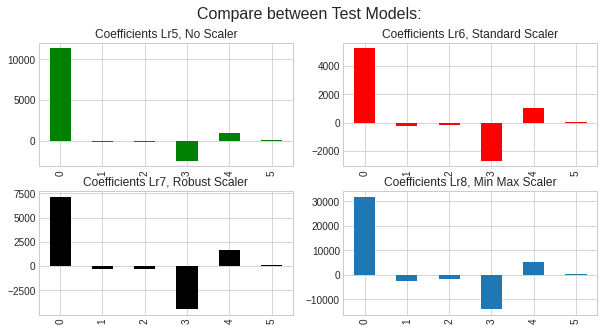

In [ ]:
fig, ax = plt.subplots(2,2)


pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, No Scaler", color="green", ax=ax[0,0])
pd.Series(lr6.coef_).plot(kind="bar", title="Coefficients Lr6, Standard Scaler", color="Red", ax=ax[0,1])
pd.Series(lr7.coef_).plot(kind="bar", title="Coefficients Lr7, Robust Scaler", color="black", ax=ax[1,0])
pd.Series(lr8.coef_).plot(kind="bar", title="Coefficients Lr8, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

# Add title
fig.suptitle('Compare between Test Models:', fontsize=16)

plt.show()
#plt.tight_layout();

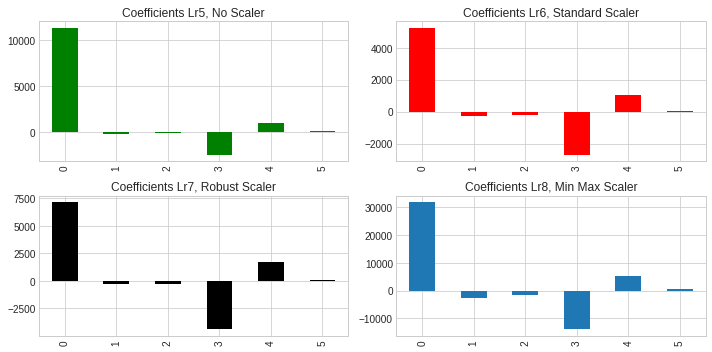

In [ ]:
fig, ax = plt.subplots(2,2)


pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, No Scaler", color="green", ax=ax[0,0])
pd.Series(lr6.coef_).plot(kind="bar", title="Coefficients Lr6, Standard Scaler", color="Red", ax=ax[0,1])
pd.Series(lr7.coef_).plot(kind="bar", title="Coefficients Lr7, Robust Scaler", color="black", ax=ax[1,0])
pd.Series(lr8.coef_).plot(kind="bar", title="Coefficients Lr8, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

#fig.suptitle('Compare between Test Models:', fontsize=16)

plt.tight_layout();